<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Grid_Search_CV_for_Hyperparameter_Validation_with_Diabetes_Dataset_Sklearn_Builtin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = load_diabetes()
X = data.data
y = data.target

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'alpha': np.logspace(-4, 4, 20)}
model = Ridge()
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)
print("Test MSE:", mse)
print("Test R-squared:", r2)

Best Parameters: {'alpha': np.float64(0.08858667904100823)}
Best CV Score: 0.4565157149371794
Test MSE: 2858.063864489175
Test R-squared: 0.4605545480479324


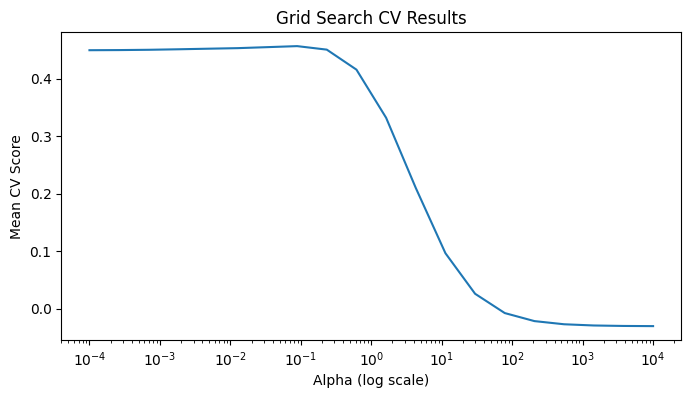

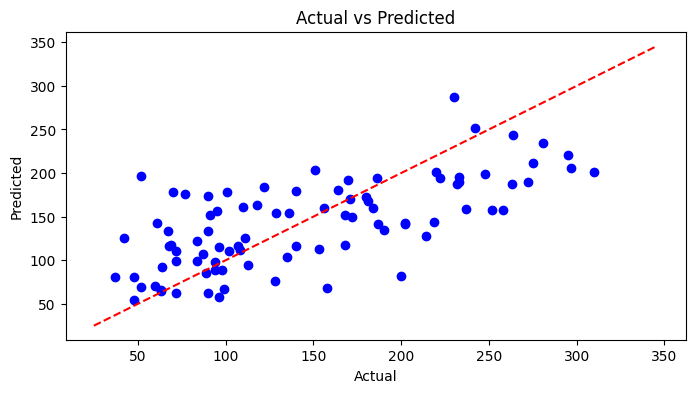

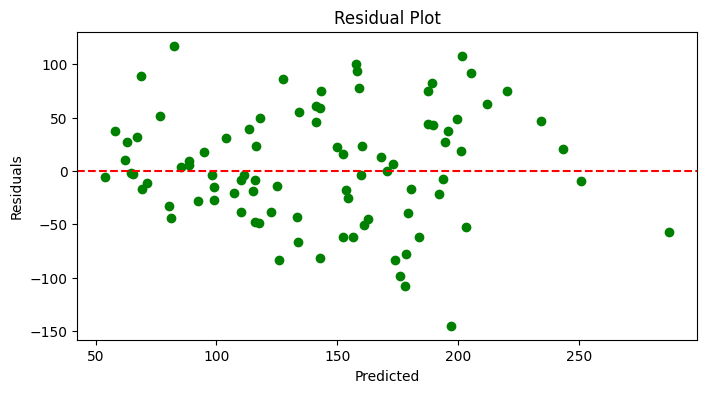

In [3]:
# Plot 1: CV Results (Mean Score vs Alpha)
plt.figure(figsize=(8, 4))
plt.semilogx(param_grid['alpha'], grid.cv_results_['mean_test_score'])
plt.title('Grid Search CV Results')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean CV Score')
plt.show()

# Plot 2: Actual vs Predicted
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Plot 3: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()